## Step 0 | Setup and Imports

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [6]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

In [8]:
# Check which files are in your Project folder
os.listdir()

['cleaned_data.csv',
 'Brainstorm.gdoc',
 'Copy of Econ 0150 Final Presentation.gslides',
 'Pittsburgh_Trees_Final_Project.csv',
 'Cleaned Up JJ + Jhanvi Final Project']

In [9]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [10]:
# Once you've mounted Google Drive, you can open a dataset from your project folder
data = pd.read_csv('Pittsburgh_Trees_Final_Project.csv')
# And you can save your dataset after you've worked on it.
#data.to_csv('cleaned_data.csv')

/tmp/ipython-input-2037852218.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Pittsburgh_Trees_Final_Project.csv')


## Step 1 (Part 1) | Univariate EDA

Summarize the main variables of interest.

In [11]:
data1 = data[['_id',  'address_number' , 'common_name' ,  'height' , 'width' , 'overall_benefits_dollar_value']]
data1

,_id,address_number,common_name,height,width,overall_benefits_dollar_value
0,1,7428.0,Stump,0.0,0.0,NaN
1,2,220.0,Linden: Littleleaf,0.0,0.0,125.178322
2,3,2822.0,Maple: Red,22.0,6.0,77.767116
3,4,608.0,Maple: Freeman,25.0,10.0,81.838259
4,5,1135.0,Maple: Norway,52.0,13.0,390.538994
...,...,...,...,...,...,...
45704,46384,499 N LANG AVE,Maple: Norway,15.0,15.0,215.042657
45705,46417,NaN,Maple: Sugar,NaN,NaN,47.889284
45706,46418,NaN,Maple: Sugar,NaN,NaN,47.889284
45707,46419,NaN,Maple: Sugar,NaN,NaN,47.889284


In [20]:
data1 = data1.dropna()
data1['tree_volume'] = data1['height'] * data1['width']
data1 = data1[data1['height'] != 0]


(0.0, 2000.0)

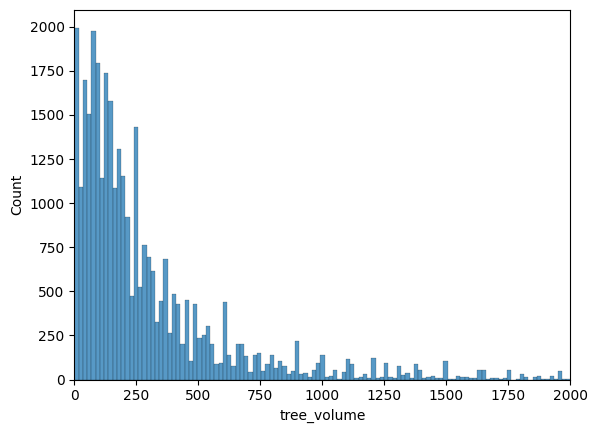

In [21]:
sns.histplot(data1['tree_volume'])
plt.xlim(0,2000)

In [14]:
data1['common_name'].value_counts().head(2)
# 2 most common city trees in Pittsburgh

,count
common_name,
Maple: Norway,3314
Maple: Red,3259


In [15]:
subset = data1[data1['common_name'].isin(['Maple: Norway', 'Maple: Red'])].copy()

# 2. Dummy variable: 1 = Norway Maple, 0 = Red Maple
subset['is_norway'] = (subset['common_name'] == 'Maple: Norway').astype(int)

# 3. Compare dollar values
model_compare = smf.ols(
    'overall_benefits_dollar_value ~ is_norway + tree_volume',
    data=subset
).fit()

print(model_compare.summary().tables[1])

                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      66.1636      0.930     71.112      0.000      64.340      67.988
is_norway      10.5825      1.065      9.938      0.000       8.495      12.670
tree_volume     0.1434      0.003     56.157      0.000       0.138       0.148


Text(0, 0.5, 'Dollar Benefits')

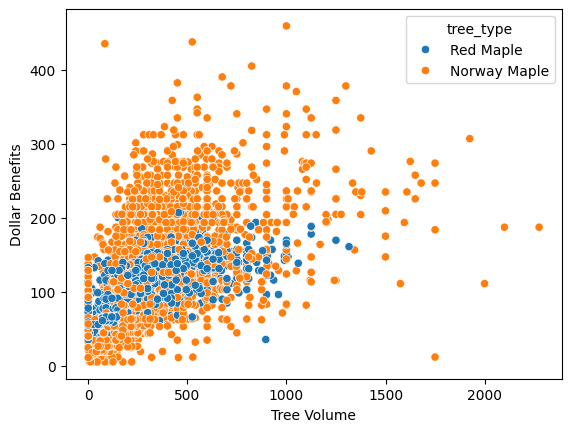

In [16]:
subset['tree_type'] = subset['is_norway'].map({0: 'Red Maple', 1: 'Norway Maple'})
sns.scatterplot(data=subset, x='tree_volume', y='overall_benefits_dollar_value', hue='tree_type')
plt.xlabel('Tree Volume')
plt.ylabel('Dollar Benefits')

Blue dots are Red maples
Orange dots are Norway Maples

In [17]:
# 3. Compare dollar values
model_compare = smf.ols(
    'overall_benefits_dollar_value ~ is_norway + tree_volume + tree_volume:is_norway',
    data=subset
).fit()

print(model_compare.summary().tables[1])

                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                69.0296      1.268     54.433      0.000      66.544      71.516
is_norway                 5.9908      1.744      3.435      0.001       2.572       9.410
tree_volume               0.1304      0.005     28.026      0.000       0.121       0.140
tree_volume:is_norway     0.0185      0.006      3.323      0.001       0.008       0.029


Average dollar benefit of red maple is 69

As you move from red to norway maple the average dollar benefit increases by 5.99

Red Maples dollar value provided increases by 0.1304 for each unit of volume and Norway Mapels increases that + an additional 0.0185 for each unit of volume

Text(50.254757378472235, 0.5, 'Dollar Benefits')

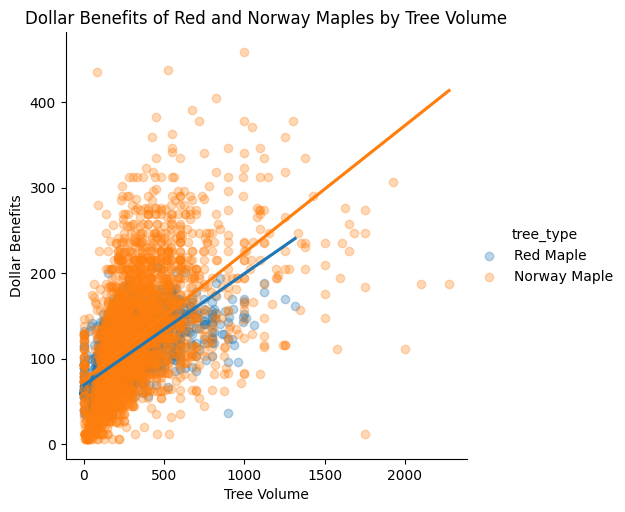

In [18]:
subset['tree_type'] = subset['is_norway'].map({0: 'Red Maple', 1: 'Norway Maple'})
sns.lmplot(data=subset, x='tree_volume', y='overall_benefits_dollar_value', hue='tree_type', scatter_kws={'alpha':0.3} , ci=0)
plt.title('Dollar Benefits of Red and Norway Maples by Tree Volume')
plt.xlabel('Tree Volume')
plt.ylabel('Dollar Benefits')

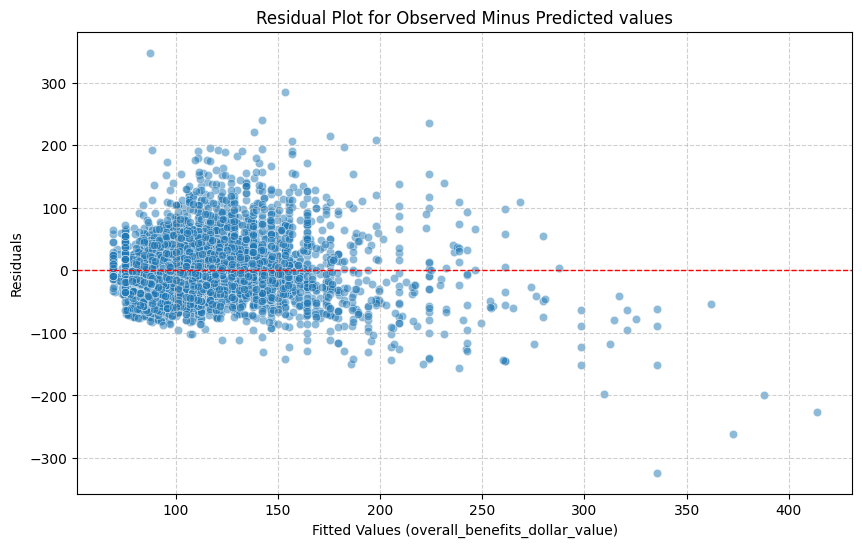

In [19]:
import matplotlib.pyplot as plt

# Get residuals and fitted values from the model
residuals = model_compare.resid
fitted_values = model_compare.fittedvalues

# Create a scatter plot of residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=1) # Add a horizontal line at 0
plt.title('Residual Plot for Observed Minus Predicted values')
plt.xlabel('Fitted Values (overall_benefits_dollar_value)')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Large value provided trees (over 300) are underpredicted by our model